In [66]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs

In [20]:
# load the data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [21]:
# identify the data type
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


In [22]:
# convert the data from object to datetime, to prevent future problems in plotting on a histogram
apple.Date = pd.to_datetime(apple.Date)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6193 non-null   datetime64[ns]
 1   Open       6193 non-null   float64       
 2   High       6193 non-null   float64       
 3   Low        6193 non-null   float64       
 4   Close      6193 non-null   float64       
 5   Adj Close  6193 non-null   float64       
 6   Volume     6193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 338.8 KB


(array([ 8035.,  9496., 10957., 12418., 13879., 15340., 16801., 18262.,
        19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

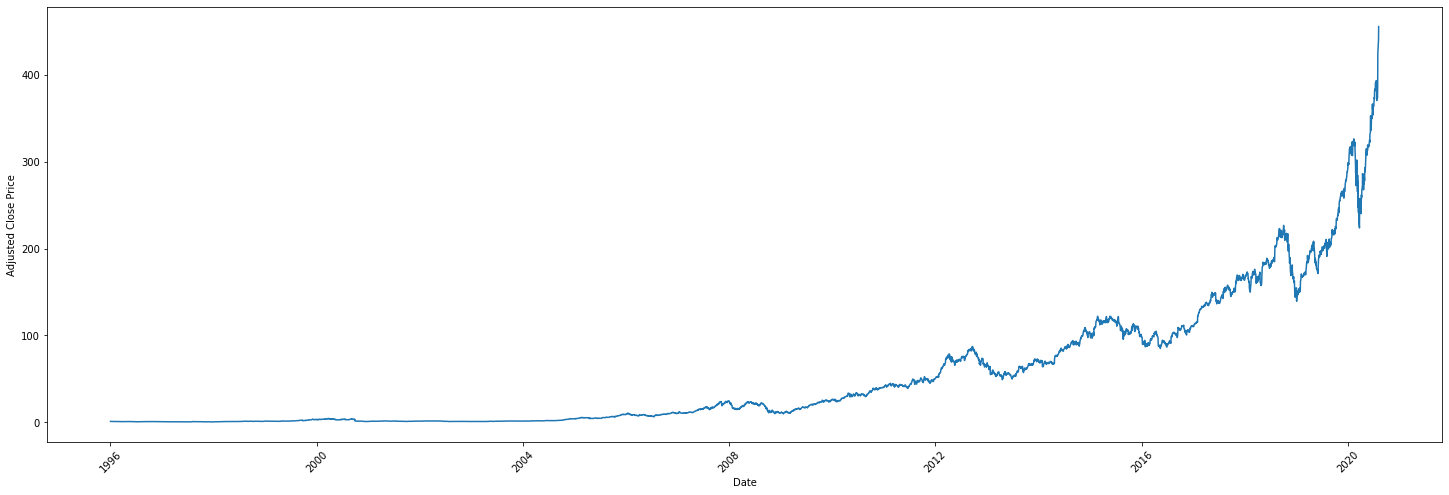

In [23]:
# visualize the data to gain some insight
plt.figure(figsize=(25,8))
plt.plot('Date','Adj Close', data=apple)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)

In [37]:
# Inference
# create new column of daily lag, by shifting the close price by 1 day back
apple['Daily Lag'] = apple['Close'].shift(1)
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600,NaN,NaN
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400,1.147321,0.000000
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600,1.147321,0.017822
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000,1.127232,-0.078467
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200,1.223214,-0.010830


In [38]:
# we will use the daily lag to calculate the daily return
# R = (I/I-1) - 1
apple['Daily Returns']=(apple['Daily Lag']/apple['Close'])-1
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600,NaN,NaN
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400,1.147321,0.000000
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600,1.147321,0.017822
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000,1.127232,-0.078467
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200,1.223214,-0.010830


<AxesSubplot:>

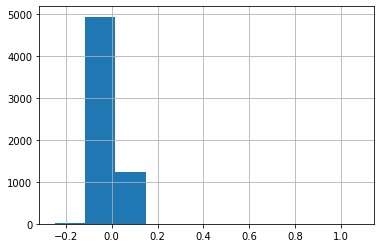

In [39]:
apple['Daily Returns'].hist()

In [53]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Daily Returns',
          x_axis_label = 'Returns', 
           y_axis_label = 'Number of Returns')

# Add a quad glyph
p.quad(bottom=0, top=apple['Daily Returns'], 
       left=apple['Open'], right=apple['Adj Close'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

Text(0.5, 1.0, 'Histogram of Daily Returns')

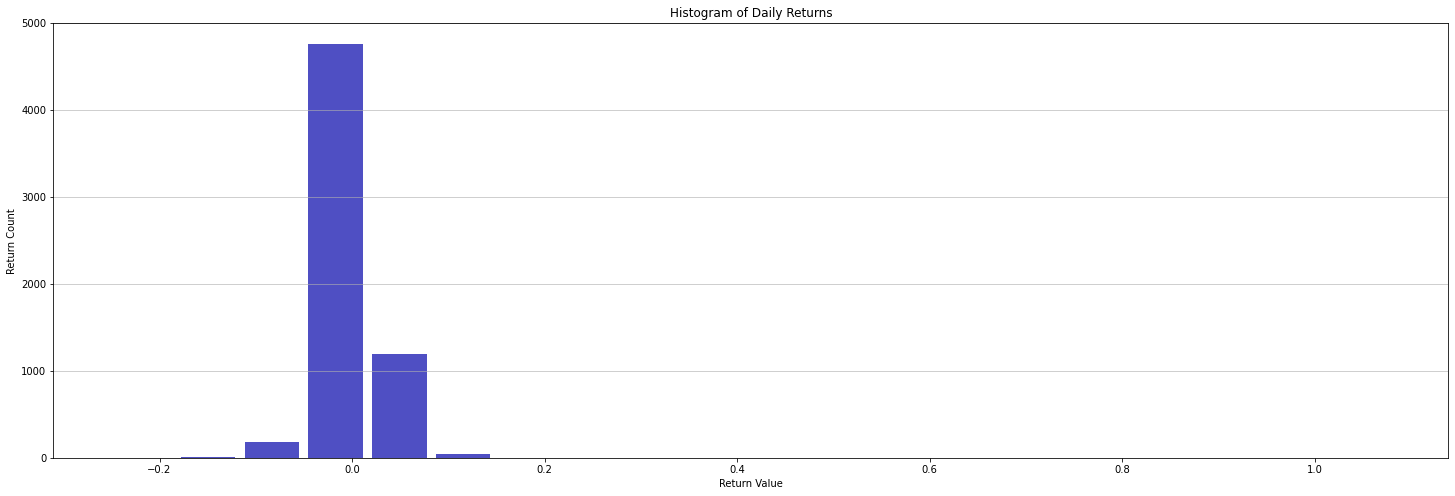

In [60]:
plt.figure(figsize=(25,8))
plt.hist(x=apple['Daily Returns'], bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Return Value')
plt.ylabel('Return Count')
plt.title('Histogram of Daily Returns')

In [61]:
mean = apple['Daily Returns'].mean()
std = apple['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -0.0005480648513595029
Std deviation = 0.03017279545971955


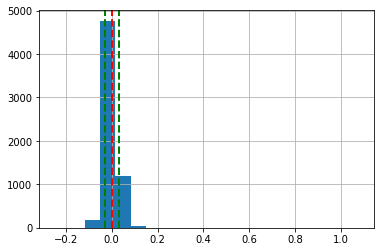

In [62]:
apple['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [64]:
# Kurtosis shows how extreme the values can get
apple['Daily Returns'].kurtosis()

266.966912743729

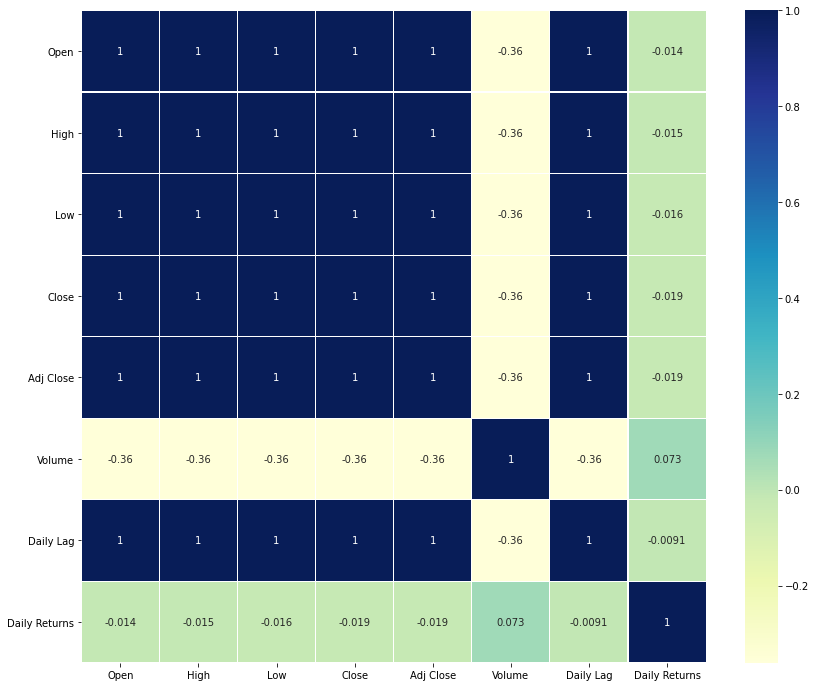

In [67]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(apple.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);